In [30]:
#Importing necessary libraries
import pandas as pd  # Untuk manipulasi data dan analisis
import numpy as np  # Untuk operasi matematika dasar
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi set pelatihan dan pengujian
from sklearn.linear_model import LinearRegression  # Untuk model regresi linear
from sklearn.preprocessing import PolynomialFeatures  # Untuk menambahkan basis fungsi (polynomial)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Untuk evaluasi model
import matplotlib.pyplot as plt  # Untuk visualisasi grafik


In [31]:
# Load the dataset
file_path = '/mnt/data/CitarumWater.csv'  # Path to the uploaded file
data = pd.read_csv('/Users/muhammadthoriqzam/Downloads/teachingMLDL-main/01. Machine Learning/02. Week 2/Dataset/CitarumWater.csv')


In [32]:
# Menampilkan beberapa baris pertama dari dataset untuk memahami strukturnya
print(data.head())


   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  


In [33]:
# Hapus kolom yang tidak relevan untuk pemodelan
data_cleaned = data.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'IP', 'O2'])


In [34]:
# Mengonversi kolom 'Temp' ke numerik dengan menghapus '°C'
data_cleaned['Temp'] = data_cleaned['Temp'].str.replace('°C', '').astype(float)


In [35]:
# Menangani nilai yang hilang dengan mengisi rata-rata kolom
data_cleaned.fillna(data_cleaned.mean(), inplace=True)


In [36]:
# Memisahkan fitur (X) dan target (y)
X = data_cleaned.drop(columns=['Class'])  # Fitur
y = data_cleaned['Class']  # Target


In [37]:
# Membagi data menjadi set pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Melatih model regresi linear sederhana (vanilla)
vanilla_model = LinearRegression()
vanilla_model.fit(X_train, y_train)


LinearRegression()

In [39]:
# Prediksi menggunakan model vanilla
y_pred_vanilla = vanilla_model.predict(X_test)


In [40]:
# Evaluasi regresi linear sederhana
mae_vanilla = mean_absolute_error(y_test, y_pred_vanilla)
mse_vanilla = mean_squared_error(y_test, y_pred_vanilla)
rmse_vanilla = np.sqrt(mse_vanilla)
r2_vanilla = r2_score(y_test, y_pred_vanilla)


In [41]:
# Cetak metrik evaluasi untuk regresi linear sederhana
print(f"Vanilla Linear Regression - MAE: {mae_vanilla}, MSE: {mse_vanilla}, RMSE: {rmse_vanilla}, R²: {r2_vanilla}")


Vanilla Linear Regression - MAE: 0.3662565110206705, MSE: 0.18379974909624336, RMSE: 0.42871872958414514, R²: 0.3944074901937261


In [42]:
# Melatih model regresi dengan basis fungsi (polynomial degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [43]:
# Melatih model regresi polynomial
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [44]:
# Prediksi menggunakan model polynomial
y_pred_poly = poly_model.predict(X_test_poly)



In [45]:
# Evaluasi regresi polynomial
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)


In [46]:
# Cetak metrik evaluasi untuk regresi polynomial
print(f"Polynomial Regression - MAE: {mae_poly}, MSE: {mse_poly}, RMSE: {rmse_poly}, R²: {r2_poly}")


Polynomial Regression - MAE: 0.27873683595251697, MSE: 0.22524305737697042, RMSE: 0.47459778484203907, R²: 0.2578580269882097


In [47]:
# Visualisasi perbandingan antara model vanilla dan polynomial
plt.figure(figsize=(10, 6))


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0, 0.5, 'Predicted')

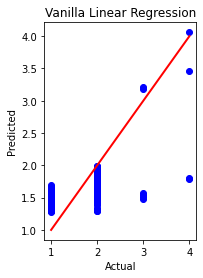

In [48]:
# Plotting actual vs predicted untuk Vanilla Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_vanilla, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Vanilla Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')


# Plotting actual vs predicted untuk Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Polynomial Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()